In [0]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
import torchvision
import torch
import numpy as np
import scipy.stats
import sklearn.manifold
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn
import pandas as pd
import sklearn
import os
import pickle
import time
from scipy.spatial import distance
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.manifold import TSNE, MDS
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

ROOT_PATH = 'gdrive/My Drive/NI Project - RSA/'

In [0]:
!pip install matplotlib==3.1.0

     |████████████████████████████████| 13.1MB 4.3MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.0.3
    Uninstalling matplotlib-3.0.3:
      Successfully uninstalled matplotlib-3.0.3


The headers are kinda screwed below, not enough time to go through them to make pretty. Everything up to "#ImageNet" should be one level deeper and under the header "#FashionMnist". So up to "#ImageNet" everything is about FashionMnist. Sorry.

#Input RDM

In [0]:
#list of accuracies of the models in the order of models having been trained
with open (ROOT_PATH + 'acc_list.pkl', 'rb') as fp:
    acc_list = pickle.load(fp)

In [0]:
#input RDMs of models, a dictionary indexed by file name of the model save.
with open (ROOT_PATH + 'corr_distances_dict800.pkl', 'rb') as fp:
    corr_distances_dict = pickle.load(fp)

In [0]:
acc_only = np.array(np.array(acc_list)[:, 0], dtype='float32')
files_only = np.array(np.array(acc_list)[:, 1])

acc_sorted_idx = np.argsort(acc_only)
acc_sorted = acc_only[acc_sorted_idx]
files_sorted = files_only[acc_sorted_idx]

Transform upper halves of input RDMs into 1D vectors. Bring data to the form expected by embedding algorithms.

In [0]:
n = len(corr_distances_dict.keys())
dim = int(200 * 199 / 2)
data = np.ones((n, dim)) * -17
triu_idx = np.triu_indices(200, k = 1)

In [0]:
for i, f in enumerate(files_sorted):
  data[i] = corr_distances_dict[f][triu_idx]

Try different embedding algorithms

In [0]:
mds = MDS(n_components=2, verbose=1)
cur_data_idx = np.random.choice(np.array(range(int(n / 2), n), dtype=int), size=18)
cur_data = data[cur_data_idx]
data_embedded = mds.fit_transform(cur_data)

breaking at iteration 158 with stress 50774.70339819763
breaking at iteration 159 with stress 61290.272994854764
breaking at iteration 127 with stress 51846.881469630156


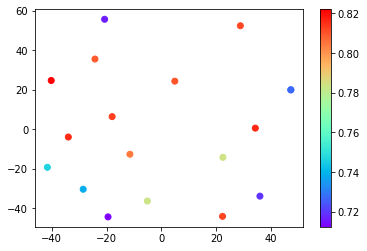

In [0]:
sc = plt.scatter(data_embedded[:, 0], data_embedded[:, 1], c=acc_sorted[cur_data_idx], cmap='rainbow')
plt.colorbar(sc)
plt.show()

In [0]:
pca = PCA(n_components=2)
pca.fit(data)
print(np.sum(pca.explained_variance_ratio_))
data_pcaed = pca.transform(data)
sc = plt.scatter(data_pcaed[:, 0], data_pcaed[:, 1], c=acc_sorted, cmap='rainbow')
plt.colorbar(sc)
plt.show()

NameError: ignored

In [0]:
tsne = TSNE(n_components=2, perplexity=10, verbose=2, n_iter=5000, learning_rate=300)
data_embedded = tsne.fit_transform(data)
print(data_embedded.shape)

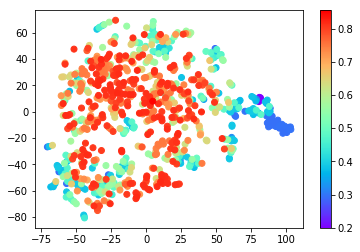

In [0]:
sc = plt.scatter(data_embedded[:, 0], data_embedded[:, 1], c=acc_sorted, cmap='rainbow')
plt.colorbar(sc)
plt.show()

To investigate if models of all accuracies are randomly scattered over the whole picture, visualise subsets of them in steps of 20% accuracy increase

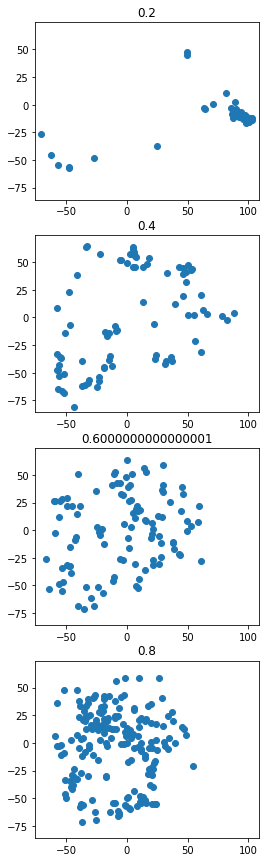

In [0]:
plt.figure(figsize=(4, 15))
borders = np.arange(0.2, 1, 0.2)
for border in borders:
  plt.subplot(len(borders), 1, int(border/0.2))
  plt.title(border)
  plt.ylim(np.min(data_embedded[:, 1]) - 5, np.max(data_embedded[:, 1]) + 5)
  plt.xlim(np.min(data_embedded[:, 0]) - 5, np.max(data_embedded[:, 0]) + 5)
  good_models_idx = (acc_sorted > border) & (acc_sorted < border + 0.1)
  sc = plt.scatter(data_embedded[good_models_idx, 0], data_embedded[good_models_idx, 1])#, c=acc_only[good_models_idx], cmap='rainbow')
#   plt.colorbar(sc)
plt.show()

#We had approximately 300 good models from 800. Is there an impact of this imbalance? In this section we figure out if excluding some of them influences visualization. Spoiler alert: it doesn't.

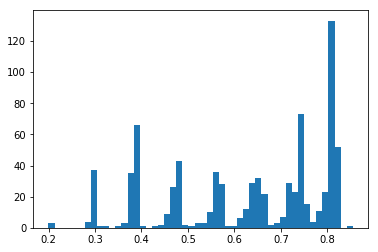

In [0]:
plt.hist(acc_only, bins=50)
plt.show()

In [0]:
acc_only = np.array(np.array(acc_list)[:, 0], dtype='float32')
files_only = np.array(np.array(acc_list)[:, 1])

acc_sorted_idx = np.argsort(acc_only)
acc_sorted = acc_only[acc_sorted_idx]
files_sorted = files_only[acc_sorted_idx]

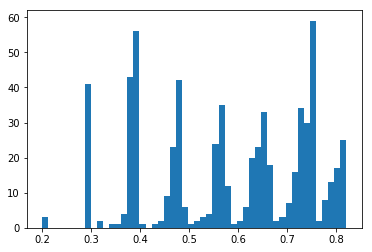

In [0]:
ind_get_rid_0_8_models = np.argmax(acc_sorted > 0.8)
a1 = np.array([True] * ind_get_rid_0_8_models)
a2 = np.arange(ind_get_rid_0_8_models, len(acc_sorted)) % 3 == 0
subsampled_idx = np.concatenate((a1, a2), axis=None)
plt.hist(acc_sorted[subsampled_idx], bins=50)
plt.show()

acc_sorted = acc_sorted[subsampled_idx]
files_sorted = files_sorted[subsampled_idx]

In [0]:
n = len(acc_sorted)
dim = int(200 * 199 / 2)
data = np.ones((n, dim)) * -17
triu_idx = np.triu_indices(200, k = 1)

In [0]:
for i, f in enumerate(files_sorted):
  data[i] = corr_distances_dict[f][triu_idx]

In [0]:
tsne = TSNE(n_components=2, perplexity=10, verbose=2, n_iter=2000, learning_rate=300)

In [0]:
data_embedded = tsne.fit_transform(data)


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 635 samples in 0.368s...
[t-SNE] Computed neighbors for 635 samples in 19.835s...
[t-SNE] Computed conditional probabilities for sample 635 / 635
[t-SNE] Mean sigma: 13.090363
[t-SNE] Computed conditional probabilities in 0.019s
[t-SNE] Iteration 50: error = 83.7607803, gradient norm = 0.4023927 (50 iterations in 0.260s)
[t-SNE] Iteration 100: error = 82.7766190, gradient norm = 0.3933035 (50 iterations in 0.261s)
[t-SNE] Iteration 150: error = 81.7852402, gradient norm = 0.4033101 (50 iterations in 0.282s)
[t-SNE] Iteration 200: error = 82.9086838, gradient norm = 0.4052167 (50 iterations in 0.252s)
[t-SNE] Iteration 250: error = 82.9392776, gradient norm = 0.4097517 (50 iterations in 0.235s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.939278
[t-SNE] Iteration 300: error = 1.4797812, gradient norm = 0.0048982 (50 iterations in 0.199s)
[t-SNE] Iteration 350: error = 1.3188207, gradient norm = 0.0025257

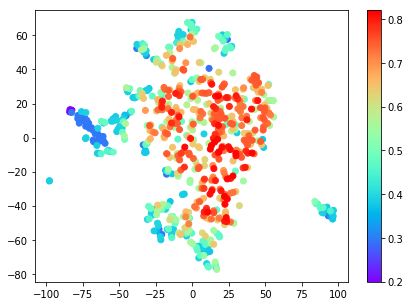

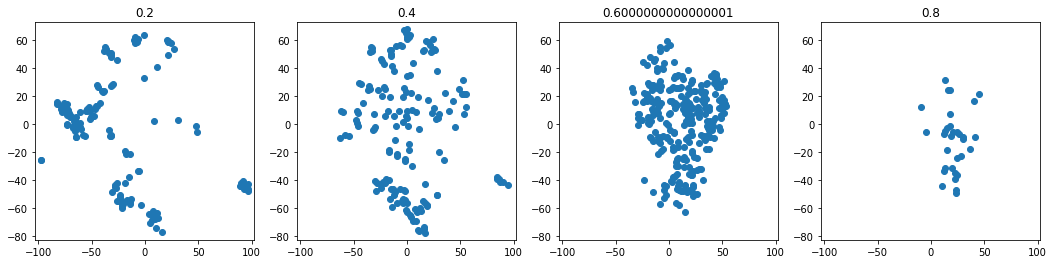

In [0]:
visualize_embedded_data(data_embedded, acc_sorted=acc_sorted)

### Nope, no significant effect

#FashionMNIST: Use Model RDMs as precomputed similarity measures to visualize t-sne embeddings for euclidean distance & correlation distance

In [0]:
with open (ROOT_PATH + 'rdm800.pkl', 'rb') as fp:
    rdm_cor = pickle.load(fp)

In [0]:
with open (ROOT_PATH + 'rdm800_eucl.pkl', 'rb') as fp:
    rdm_eucl = pickle.load(fp)

In [0]:
with open (ROOT_PATH + 'acc_list.pkl', 'rb') as fp:
    acc_list = pickle.load(fp)

In [0]:
acc_only = np.array(np.array(acc_list)[:, 0], dtype='float32')
files_only = np.array(np.array(acc_list)[:, 1])

acc_sorted_idx = np.argsort(acc_only)
acc_sorted = acc_only[acc_sorted_idx]
files_sorted = files_only[acc_sorted_idx]

In [0]:
# tsne = TSNE(metric='precomputed', verbose=2)
tsne = TSNE(n_components=2, perplexity=10, verbose=2, n_iter=2000, learning_rate=300, metric='precomputed')

In [0]:
def visualize_embedded_data(data_embedded, acc_sorted=acc_sorted, show_sequential_subsets=True,
                           start=0.2, end=1, step=0.2):
  plt.figure(figsize=(7, 5))
  sc = plt.scatter(data_embedded[:, 0], data_embedded[:, 1], c=acc_sorted, cmap='rainbow')
  plt.colorbar(sc)
  plt.show()
  
  if not show_sequential_subsets:
    return
  
  plt.figure(figsize=(18, 4))
  borders = np.arange(start, end, step)
  for i, border in enumerate(borders):
    plt.subplot(1, len(borders), i + 1)
    plt.title(border)
    plt.ylim(np.min(data_embedded[:, 1]) - 5, np.max(data_embedded[:, 1]) + 5)
    plt.xlim(np.min(data_embedded[:, 0]) - 5, np.max(data_embedded[:, 0]) + 5)
    cur_models_idx = (acc_sorted > border) & (acc_sorted < border + step)
    sc = plt.scatter(data_embedded[cur_models_idx, 0], data_embedded[cur_models_idx, 1])
  plt.show()

##All models, correlation distance

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 795 samples in 0.002s...
[t-SNE] Computed neighbors for 795 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 795 / 795
[t-SNE] Mean sigma: 0.124531
[t-SNE] Computed conditional probabilities in 0.019s
[t-SNE] Iteration 50: error = 85.4589005, gradient norm = 0.4056564 (50 iterations in 0.315s)
[t-SNE] Iteration 100: error = 85.0170898, gradient norm = 0.4004524 (50 iterations in 0.327s)
[t-SNE] Iteration 150: error = 85.7324600, gradient norm = 0.4038632 (50 iterations in 0.317s)
[t-SNE] Iteration 200: error = 84.8664627, gradient norm = 0.4074751 (50 iterations in 0.328s)
[t-SNE] Iteration 250: error = 84.8654556, gradient norm = 0.4050317 (50 iterations in 0.330s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.865456
[t-SNE] Iteration 300: error = 1.7592605, gradient norm = 0.0029138 (50 iterations in 0.236s)
[t-SNE] Iteration 350: error = 1.5724959, gradient norm = 0.0011736 (

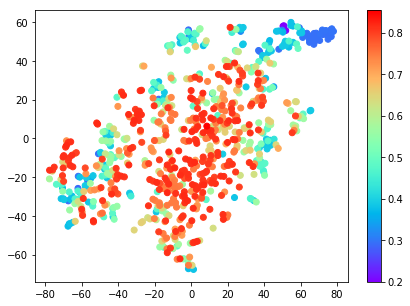

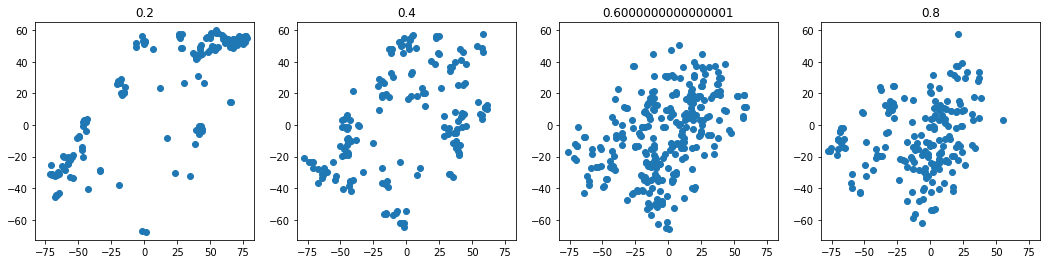

In [0]:
data_embedded = tsne.fit_transform(rdm_cor)
visualize_embedded_data(data_embedded)

##All models, eucledian distance

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 795 samples in 0.001s...
[t-SNE] Computed neighbors for 795 samples in 0.017s...
[t-SNE] Computed conditional probabilities for sample 795 / 795
[t-SNE] Mean sigma: 1.718650
[t-SNE] Computed conditional probabilities in 0.017s
[t-SNE] Iteration 50: error = 85.6494141, gradient norm = 0.4032807 (50 iterations in 0.327s)
[t-SNE] Iteration 100: error = 85.0207977, gradient norm = 0.3962249 (50 iterations in 0.333s)
[t-SNE] Iteration 150: error = 84.3643188, gradient norm = 0.4026662 (50 iterations in 0.345s)
[t-SNE] Iteration 200: error = 84.2598267, gradient norm = 0.4097966 (50 iterations in 0.349s)
[t-SNE] Iteration 250: error = 84.0798340, gradient norm = 0.4085974 (50 iterations in 0.328s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.079834
[t-SNE] Iteration 300: error = 1.6541457, gradient norm = 0.0041245 (50 iterations in 0.261s)
[t-SNE] Iteration 350: error = 1.4816842, gradient norm = 0.0012394 (

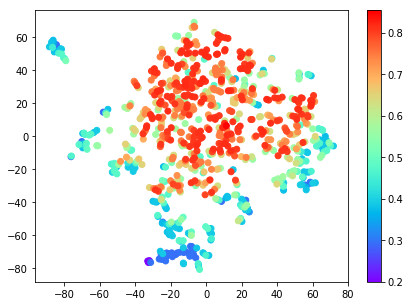

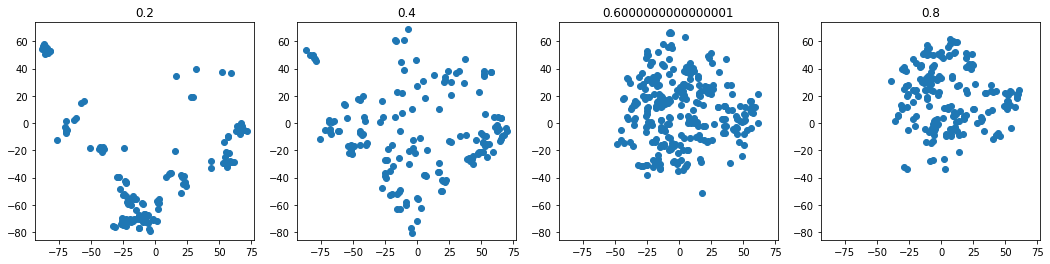

In [0]:
data_embedded = tsne.fit_transform(rdm_eucl)
visualize_embedded_data(data_embedded)

## Embed only good models (accuracy more than 70%)

In [0]:
good_models_start_ind = np.argmax(acc_sorted > 0.7)

### Good models, correlation distance

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 369 samples in 0.001s...
[t-SNE] Computed neighbors for 369 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 369 / 369
[t-SNE] Mean sigma: 0.133618
[t-SNE] Computed conditional probabilities in 0.017s
[t-SNE] Iteration 50: error = 81.5266724, gradient norm = 0.4156682 (50 iterations in 0.117s)
[t-SNE] Iteration 100: error = 82.4392624, gradient norm = 0.4053807 (50 iterations in 0.135s)
[t-SNE] Iteration 150: error = 84.7351532, gradient norm = 0.3944516 (50 iterations in 0.134s)
[t-SNE] Iteration 200: error = 84.4797974, gradient norm = 0.3768440 (50 iterations in 0.129s)
[t-SNE] Iteration 250: error = 83.2516022, gradient norm = 0.3997245 (50 iterations in 0.133s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.251602
[t-SNE] Iteration 300: error = 2.0432856, gradient norm = 0.0052595 (50 iterations in 0.098s)
[t-SNE] Iteration 350: error = 1.8171659, gradient norm = 0.0024124 (

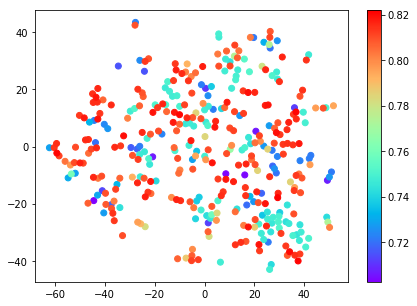

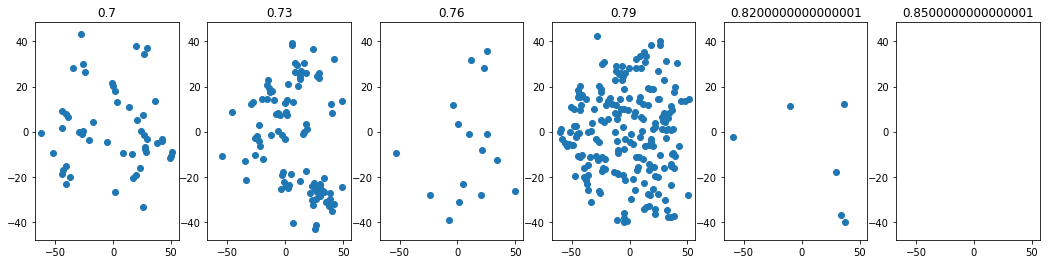

In [0]:
tsne = TSNE(n_components=2, perplexity=10, verbose=2, n_iter=2000, learning_rate=300, metric='precomputed')
data_embedded = tsne.fit_transform(rdm_cor[good_models_start_ind:-1, good_models_start_ind:-1])
visualize_embedded_data(data_embedded, acc_sorted[good_models_start_ind:-1], start=0.7, end=0.85, step=0.03)

##Good models, euclidean distance

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 370 samples in 0.001s...
[t-SNE] Computed neighbors for 370 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 370 / 370
[t-SNE] Mean sigma: 1.607306
[t-SNE] Computed conditional probabilities in 0.009s
[t-SNE] Iteration 50: error = 86.2858505, gradient norm = 0.3818435 (50 iterations in 0.129s)
[t-SNE] Iteration 100: error = 84.1245193, gradient norm = 0.3905742 (50 iterations in 0.131s)
[t-SNE] Iteration 150: error = 83.8699341, gradient norm = 0.4048547 (50 iterations in 0.120s)
[t-SNE] Iteration 200: error = 84.9221268, gradient norm = 0.3941479 (50 iterations in 0.125s)
[t-SNE] Iteration 250: error = 81.6078110, gradient norm = 0.4171036 (50 iterations in 0.142s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.607811
[t-SNE] Iteration 300: error = 1.9262280, gradient norm = 0.0060543 (50 iterations in 0.104s)
[t-SNE] Iteration 350: error = 1.7361840, gradient norm = 0.0026638 (

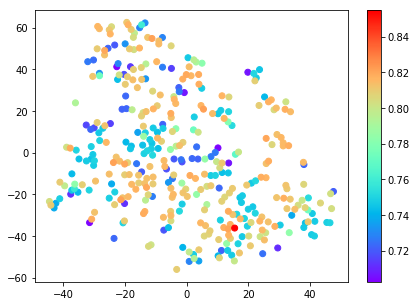

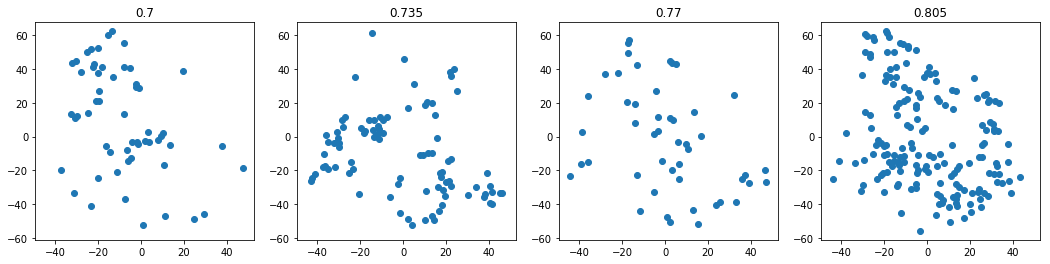

In [0]:
data_embedded = tsne.fit_transform(rdm_eucl[good_models_start_ind:, good_models_start_ind:])


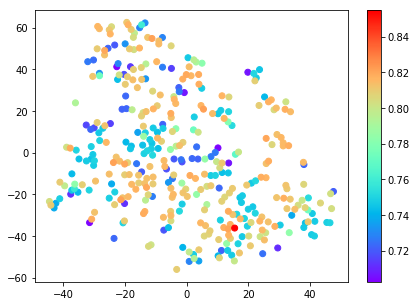

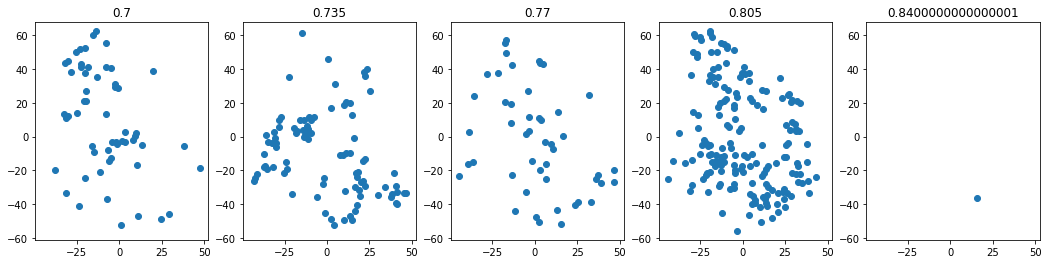

In [0]:
visualize_embedded_data(data_embedded, acc_sorted[good_models_start_ind:], start=0.7, end=0.841, step=0.035)

#ImageNet

In [0]:
files_only = np.array(['corrMatrix_vgg13_bn.npy', 'corrMatrix_vgg11_bn.npy', 'corrMatrix_alexnet_recalc.npy', 'corrMatrix_densenet121_recalc.npy', 'corrMatrix_resnet18_recalc.npy', 'corrMatrix_resnet34.npy', 'corrMatrix_resnet50.npy', 'corrMatrix_resnext50_32x4d.npy', 'corrMatrix_resnext101_32x8d.npy', 'corrMatrix_vgg13.npy', 'corrMatrix_vgg16_bn.npy', 'corrMatrix_vgg16.npy', 'corrMatrix_vgg19_bn.npy', 'corrMatrix_resnet101.npy', 'corrMatrix_squeezenet1_0.npy', 'corrMatrix_squeezenet1_1_.npy', 'corrMatrix_mobilenet.npy', 'corrMatrix_googlenet.npy'])
files_pretty_names = np.array(['vgg13_bn', 'vgg11_bn', 'alexnet', 'densenet121', 'resnet18', 'resnet34', 'resnet50', 'resnext50_32x4d', 'resnext101_32x8d', 'vgg13', 'vgg16_bn', 'vgg16', 'vgg19_bn', 'resnet101', 'squeezenet1_0', 'squeezenet1_1', 'mobilenet', 'googlenet'])

In [0]:
acc_only = np.array([28.45, 29.62, 43.45, 25.35, 30.24, 26.70, 23.85, 22.38, 20.69, 30.07, 26.63, 28.41, 25.76, 22.63, 41.9, 41.81, 28.12, 30.22])

In [0]:
acc_sorted_idx = np.argsort(acc_only)
acc_sorted = acc_only[acc_sorted_idx]
files_sorted = files_only[acc_sorted_idx]
files_pretty_names_sorted = files_pretty_names[acc_sorted_idx]

In [0]:
n = len(files_only)
dim = int(10000 * 9999 / 2)
triu_idx = np.triu_indices(10000, k = 1)

Note: here and in other places I initialize arrays with '-17' to make it obvious if some value wasn't initialized properly (which you wouldn't be able to figure out when initializing with ones or zeros)

In [0]:
data = np.ones((n, dim)) * -17

In [0]:
for i, f in enumerate(files_sorted):
  print(i)
  cur = np.load(ROOT_PATH + 'RSA_on_ImageNet/activations/' + f)
  print(i)
  data[i] = cur[triu_idx]
  del(cur)

0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11
11
12
12
13
13
14
14
15
15
16
16
17
17


In [0]:
mds = MDS(n_components=2, n_init=100, max_iter=2000, eps=0.0001)
data_embedded = mds.fit_transform(data)

# tsne = TSNE(n_components=2, perplexity=4, verbose=2)#, n_iter=1000, learning_rate=300)
# data_embedded = tsne.fit_transform(data)

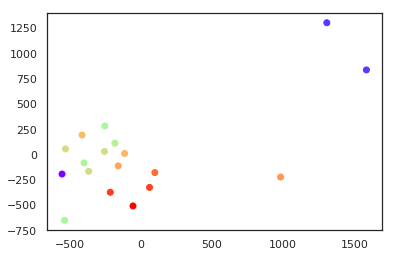

In [0]:
seaborn.set_style(style='white')
plt.scatter(data_embedded[:, 0], data_embedded[:, 1], c=100-acc_sorted, cmap='rainbow')

#### Trying (and failing) to print model names

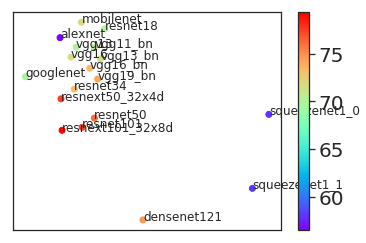

In [0]:
fig, ax = plt.subplots()


markers = [marker_from_name(f) for f in files_pretty_names_sorted]
sc = plt.scatter(data_embedded[:, 0], data_embedded[:, 1], c=100-acc_sorted, cmap='rainbow', label=files_pretty_names_sorted)
cbar = plt.colorbar(sc)
cbar.ax.tick_params(labelsize=20) 

for i in range(n):
  ax.annotate(files_pretty_names_sorted[i], (data_embedded[i, 0], data_embedded[i, 1]))


ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax.set_yticklabels([])
ax.set_xticklabels([])

plt.show()